In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import holidays
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import seaborn as sns

In [17]:
df = pd.read_csv('/Users/thanoskaraiskos/Documents/GitHub/city-bike/data/Trips_2018/Trips_2018_clean.csv', parse_dates=['start_time', 'stop_time'])
df.head()
# df.info()

,tripduration,start_station_id,start_station_latitude,start_station_longitude,end_station_id,end_station_latitude,end_station_longitude,bikeid,usertype,birth_year,gender,start_time,stop_time
0,970,72.0,40.767272,-73.993929,505.0,40.749013,-73.988484,31956,1,1992,1,2018-01-01 13:50:57.434,2018-01-01 14:07:08.186
1,723,72.0,40.767272,-73.993929,3255.0,40.750585,-73.994685,32536,1,1969,1,2018-01-01 15:33:30.182,2018-01-01 15:45:33.341
2,496,72.0,40.767272,-73.993929,525.0,40.755942,-74.002116,16069,1,1956,1,2018-01-01 15:39:18.337,2018-01-01 15:47:35.172
3,306,72.0,40.767272,-73.993929,447.0,40.763707,-73.985162,31781,1,1974,1,2018-01-01 15:40:13.372,2018-01-01 15:45:20.191
4,306,72.0,40.767272,-73.993929,3356.0,40.774667,-73.984706,30319,1,1992,1,2018-01-01 18:14:51.568,2018-01-01 18:19:57.642


In [5]:
# Get US holidays for the year 2018
us_holidays = holidays.US(years=[2018])

# Extract date type from start_time
df['date'] = df['start_time'].dt.date

# Define the category of the date
def categorize_date(date):
    if pd.to_datetime(date).weekday() >= 5:  # 5 = Saturday, 6 = Sunday
        return 'Weekend'
    elif date in us_holidays:
        return 'Holiday'
    else:
        return 'Weekday'
    
# Apply the categorization
df['category'] = df['date'].apply(categorize_date)

In [14]:
# Calculate the total trips per individual category
daily_counts = df.groupby(['date', 'category']).size().reset_index(name='daily_trips')

# Calculate the average daily trips for each category
result = daily_counts.groupby('category')['daily_trips'].mean().round(2)

print(result)
print(daily_counts.head())

category
Holiday    32949.90
Weekday    51719.76
Weekend    40717.32
Name: daily_trips, dtype: float64
         date category  daily_trips
0  2018-01-01  Holiday         5500
1  2018-01-02  Weekday        18818
2  2018-01-03  Weekday        24299
3  2018-01-04  Weekday         1922
4  2018-01-05  Weekday         4972


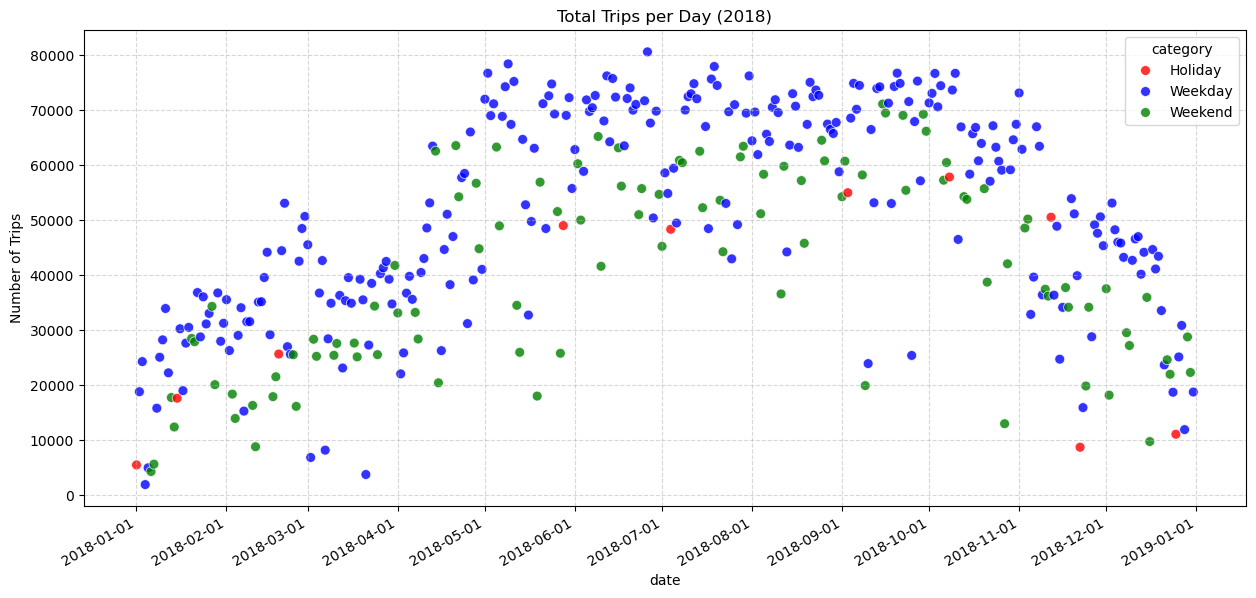

In [7]:
# Prepare the data (Count trips per day)
daily_counts = df.groupby(['date', 'category']).size().reset_index(name='trip_count')

plt.figure(figsize=(15, 7))

sns.scatterplot(data=daily_counts, x='date', y='trip_count', hue='category', 
                palette={'Weekday': 'blue', 'Weekend': 'green', 'Holiday': 'red'},
                s=50, alpha=0.8)

# Format the Date Axis
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
plt.gca().xaxis.set_major_locator(mdates.MonthLocator())
plt.gcf().autofmt_xdate()

plt.title('Total Trips per Day (2018)')
plt.ylabel('Number of Trips')
plt.grid(True, linestyle='--', alpha=0.5)
plt.show()

In [8]:
order = ['Weekday', 'Weekend', 'Holiday']

# Average trip duration per category
average_duration = df.groupby('category')['tripduration'].mean()

# Print the results
print("\nAverage Trip Duration by Category (in seconds):")
for category in order:
    if category in average_duration:
        print(f"{category}: {average_duration[category]:.2f} seconds")


Average Trip Duration by Category (in seconds):
Weekday: 926.50 seconds
Weekend: 1170.30 seconds
Holiday: 1091.28 seconds


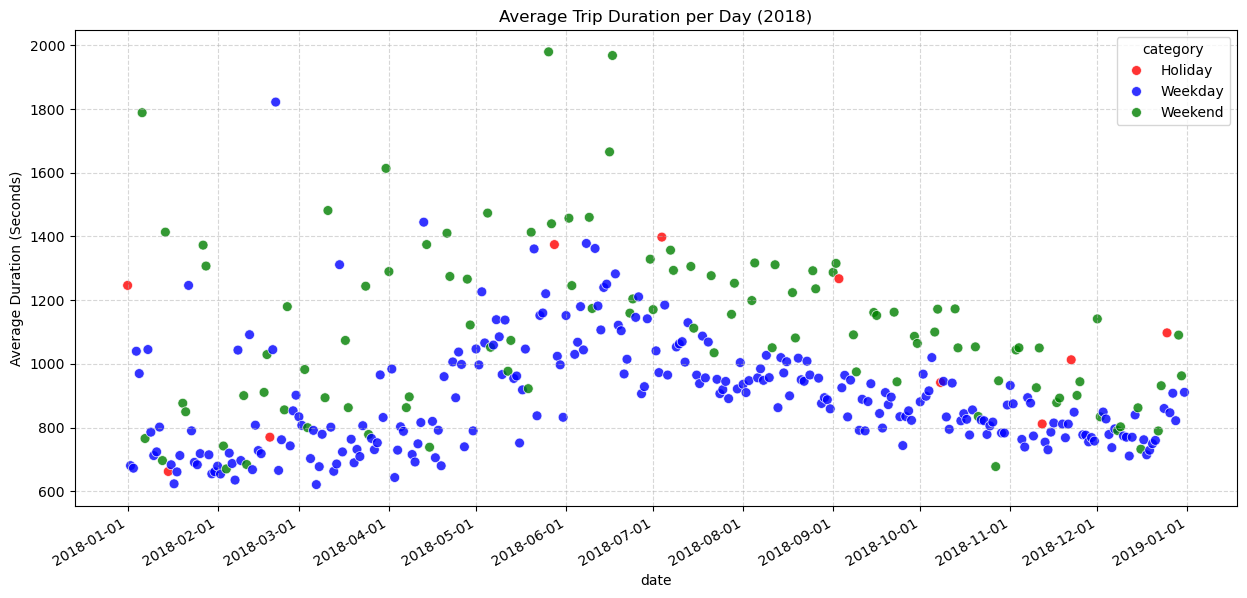

In [11]:
# 3. Calculate Total Trip Duration per Day
# We group by date and category, then SUM the 'tripduration' column
daily_duration = df.groupby(['date', 'category'])['tripduration'].mean().reset_index(name='total_duration')

# Optional: Convert seconds to Hours for better readability
# daily_duration['total_duration'] = daily_duration['total_duration'] / 3600

# 4. Plotting
plt.figure(figsize=(15, 7))

sns.scatterplot(data=daily_duration, x='date', y='total_duration', 
                hue='category', 
                palette={'Weekday': 'blue', 'Weekend': 'green', 'Holiday': 'red'},
                s=50, alpha=0.8)

# Format the Date Axis
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
plt.gca().xaxis.set_major_locator(mdates.MonthLocator())
plt.gcf().autofmt_xdate()

# Update Titles and Labels
plt.title('Average Trip Duration per Day (2018)')
plt.ylabel('Average Duration (Seconds)')  # Update this label if you converted to hours
plt.grid(True, linestyle='--', alpha=0.5)

plt.show()